In [1]:
import pandas as pd
import numpy as np

In [2]:
df_plc26 = pd.read_csv('data/logs_20220526_0930-1730_plc.csv', header=0, index_col=0, parse_dates=True)
df_plc26.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28658 entries, 2022-05-26 09:30:00 to 2022-05-26 15:30:41
Data columns (total 21 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                        --------------  -----  
 0   Operation_mode {_start="2022-05-26 01:30:00 +0000 UTC", _stop="2022-05-26 09:30:00 +0000 UTC", host="a1264a8bcdb3"}           28655 non-null  float64
 1   Pmp_Start {_start="2022-05-26 01:30:00 +0000 UTC", _stop="2022-05-26 09:30:00 +0000 UTC", host="a1264a8bcdb3"}                28656 non-null  object 
 2   Quality {_start="2022-05-26 01:30:00 +0000 UTC", _stop="2022-05-26 09:30:00 +0000 UTC", host="a1264a8bcdb3"}                  28658 non-null  object 
 3   Scada_mtr_start {_start="2022-05-26 01:30:00 +0000 UTC", _stop="2022-05-26 0

In [3]:
df_plc25 = pd.read_csv('data/logs_20220525_0930-1730_plc.csv', header=0, index_col=0, parse_dates=True)
df_plc25.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28626 entries, 2022-05-25 09:30:00 to 2022-05-25 17:29:59
Data columns (total 21 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                        --------------  -----  
 0   Operation_mode {_start="2022-05-25 01:30:00 +0000 UTC", _stop="2022-05-25 09:30:00 +0000 UTC", host="a1264a8bcdb3"}           28626 non-null  int64  
 1   Pmp_Start {_start="2022-05-25 01:30:00 +0000 UTC", _stop="2022-05-25 09:30:00 +0000 UTC", host="a1264a8bcdb3"}                28626 non-null  bool   
 2   Quality {_start="2022-05-25 01:30:00 +0000 UTC", _stop="2022-05-25 09:30:00 +0000 UTC", host="a1264a8bcdb3"}                  28626 non-null  object 
 3   Scada_mtr_start {_start="2022-05-25 01:30:00 +0000 UTC", _stop="2022-05-25 0

# EDA of Datasets under normal operating conditions
EDA will be performed for the 2 days of normal operating conditions of the water tank system. The sections in this notebook are organised as follows:
1. Normalizing of title 

## Detecting the rows with empty values
In this section, we will find the rows that contain null values in both the `plc` datasets

In [4]:
df_plc26_nan_idx = [index for index, row in df_plc26.iterrows() if row.isnull().any()]
print(df_plc26_nan_idx)

[Timestamp('2022-05-26 13:29:49'), Timestamp('2022-05-26 11:29:08'), Timestamp('2022-05-26 15:30:41')]


In [5]:
df_plc25_nan_idx = [index for index, row in df_plc25.iterrows() if row.isnull().any()]
print(df_plc25_nan_idx)

[]


Both PLC datasets containing discontinuities in timestamp due to the trial kepware license. The trial version has to be renewed every 2-hourly. The missing timestamps are as follows:
* for `df_plc26`:
1. 11:29:08 - 11:29:46
2. 13:29:49 - 13:30:38
3. 15:30:41 - 15:31:31
* for `df_plc25`:
1. 11:18:36 - 11:19:25
2. 13:19:38 - 13:20:16
3. 15:20:27 - 15:21:07

Note that the missing timestamps do not correspond to `NaN` values within the dataset. The missing rows are just truncated form the dataset.

## Normalizing column names
The column names are normalized for ease of reference subsequently.

In [6]:
# df_plc26.columns = df_plc26.columns.str.lower()
plc_columns = ['ops_mode_scada_output',
'pump_start_output', 
'quality',
'pump_start_scada_input',
'valve-a_start_scada_input',
'valve-b_start_scada_input',
'tank-a_upper_sensor',
'tank-a_height',
'tank-a_lower_sensor',
'tank-a_raw_lvl',
'tank-a_vol',
'tank-b_upper_sensor',
'tank-b_height',
'tank-b_lower_sensor',
'tank-b_raw_lvl',
'tank-b_vol',
'valve-a_hmi_input',
'valve-a_open',
'valve-b_hmi_input',
'valve-b_open',
'writable_ops_mode_scada_input']
df_plc26.columns = plc_columns
df_plc25.columns = plc_columns

## Check the dtypes of individual columns
Here the dtypes for the columns are checked. Columns holding `True` or `False` will be mapped to `1` and `0` respectively.

In [7]:
df_plc25.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28626 entries, 2022-05-25 09:30:00 to 2022-05-25 17:29:59
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ops_mode_scada_output          28626 non-null  int64  
 1   pump_start_output              28626 non-null  bool   
 2   quality                        28626 non-null  object 
 3   pump_start_scada_input         28626 non-null  bool   
 4   valve-a_start_scada_input      28626 non-null  bool   
 5   valve-b_start_scada_input      28626 non-null  bool   
 6   tank-a_upper_sensor            28626 non-null  bool   
 7   tank-a_height                  28626 non-null  int64  
 8   tank-a_lower_sensor            28626 non-null  bool   
 9   tank-a_raw_lvl                 28626 non-null  int64  
 10  tank-a_vol                     28626 non-null  float64
 11  tank-b_upper_sensor            28626 non-null  bool   
 12  tank-b_heig

In [8]:
# plc_boolean_columns = list(df_plc25.select_dtypes(include=['bool']).columns)
df_plc25.replace([True, False], value=[1, 0], inplace=True)
df_plc26.replace([True, False], value=[1, 0], inplace=True)

In [9]:
df_plc25.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28626 entries, 2022-05-25 09:30:00 to 2022-05-25 17:29:59
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ops_mode_scada_output          28626 non-null  int64  
 1   pump_start_output              28626 non-null  int64  
 2   quality                        28626 non-null  object 
 3   pump_start_scada_input         28626 non-null  int64  
 4   valve-a_start_scada_input      28626 non-null  int64  
 5   valve-b_start_scada_input      28626 non-null  int64  
 6   tank-a_upper_sensor            28626 non-null  int64  
 7   tank-a_height                  28626 non-null  int64  
 8   tank-a_lower_sensor            28626 non-null  int64  
 9   tank-a_raw_lvl                 28626 non-null  int64  
 10  tank-a_vol                     28626 non-null  float64
 11  tank-b_upper_sensor            28626 non-null  int64  
 12  tank-b_heig

## Determine columns to drop
Check the number of unique values in each column using `nunique()`. Those columns that contain only a single value throughout can be considered for dropping **IF** they do not provide additional values during the attacks.

In [10]:
df_plc26.nunique()

ops_mode_scada_output               2
pump_start_output                   2
quality                             1
pump_start_scada_input              1
valve-a_start_scada_input           1
valve-b_start_scada_input           1
tank-a_upper_sensor                 2
tank-a_height                      80
tank-a_lower_sensor                 1
tank-a_raw_lvl                   8549
tank-a_vol                         80
tank-b_upper_sensor                 2
tank-b_height                      81
tank-b_lower_sensor                 1
tank-b_raw_lvl                   8476
tank-b_vol                         81
valve-a_hmi_input                   1
valve-a_open                        2
valve-b_hmi_input                   1
valve-b_open                        2
writable_ops_mode_scada_input       2
dtype: int64

In [11]:
df_plc26.index.rename('time', inplace=True)
df_plc25.index.rename('time', inplace=True)

In [12]:
df_plc26.drop(df_plc26.index[-3:], inplace=True)
df_plc26.drop(labels=['quality', 'tank-a_raw_lvl', 'tank-b_raw_lvl', 'tank-a_vol', 'tank-b_vol'], axis=1, inplace=True)
df_plc26.tail()

,ops_mode_scada_output,pump_start_output,pump_start_scada_input,valve-a_start_scada_input,valve-b_start_scada_input,tank-a_upper_sensor,tank-a_height,tank-a_lower_sensor,tank-b_upper_sensor,tank-b_height,tank-b_lower_sensor,valve-a_hmi_input,valve-a_open,valve-b_hmi_input,valve-b_open,writable_ops_mode_scada_input
time,,,,,,,,,,,,,,,,
2022-05-26 17:29:55,0.0,0.0,0.0,0.0,0.0,0.0,120,1.0,0.0,94,1.0,0.0,0.0,0.0,0.0,0.0
2022-05-26 17:29:56,0.0,0.0,0.0,0.0,0.0,0.0,120,1.0,0.0,94,1.0,0.0,0.0,0.0,0.0,0.0
2022-05-26 17:29:57,0.0,0.0,0.0,0.0,0.0,0.0,120,1.0,0.0,94,1.0,0.0,0.0,0.0,0.0,0.0
2022-05-26 17:29:58,0.0,0.0,0.0,0.0,0.0,0.0,121,1.0,0.0,94,1.0,0.0,0.0,0.0,0.0,0.0
2022-05-26 17:29:59,0.0,0.0,0.0,0.0,0.0,0.0,120,1.0,0.0,94,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df_plc25.drop(labels=['quality', 'tank-a_raw_lvl', 'tank-b_raw_lvl', 'tank-a_vol', 'tank-b_vol'], axis=1, inplace=True)
df_plc25.tail()

,ops_mode_scada_output,pump_start_output,pump_start_scada_input,valve-a_start_scada_input,valve-b_start_scada_input,tank-a_upper_sensor,tank-a_height,tank-a_lower_sensor,tank-b_upper_sensor,tank-b_height,tank-b_lower_sensor,valve-a_hmi_input,valve-a_open,valve-b_hmi_input,valve-b_open,writable_ops_mode_scada_input
time,,,,,,,,,,,,,,,,
2022-05-25 17:29:55,0,0,0,0,0,0,121,1,0,97,1,0,0,0,0,0
2022-05-25 17:29:56,0,0,0,0,0,0,121,1,0,97,1,0,0,0,0,0
2022-05-25 17:29:57,0,0,0,0,0,0,121,1,0,97,1,0,0,0,0,0
2022-05-25 17:29:58,0,0,0,0,0,0,121,1,0,97,1,0,0,0,0,0
2022-05-25 17:29:59,0,0,0,0,0,0,121,1,0,97,1,0,0,0,0,0


## Calculating the IQRs
A `total_height` column is created by summing the heights of the tanks across both days under normal operations. The idea here is that if an attack causes changes in the `total_height` of the water tanks by overflowing or adding additional water, it should be picked up. The max and min values are also printed to get a sense of the order of magnitude.

The distributions for `total_height` are plotted to determine the skewness of the feature. A baseline is considered to classify points outside of *1.5 IQR* as anomalies.

In [14]:
print("Percentile statistics of df_plc25")
print(60 * '-')
df_plc25['total_height'] = df_plc25['tank-a_height'] + df_plc25['tank-b_height']
plc25_iqr = df_plc25['total_height'].quantile(0.75) - df_plc25['total_height'].quantile(0.25)
print(f"The max and min values are {df_plc25['total_height'].max()} and {df_plc25['total_height'].min()} respectively")
print(f"25th percentile: {df_plc25['total_height'].quantile(0.25)}")
print(f"75th percentile: {df_plc25['total_height'].quantile(0.75)}")

Percentile statistics of df_plc25
------------------------------------------------------------
The max and min values are 224 and 215 respectively
25th percentile: 219.0
75th percentile: 221.0


In [15]:
print("Percentile statistics of df_plc26")
print(60 * '-')
df_plc26['total_height'] = df_plc26['tank-a_height'] + df_plc26['tank-b_height']
plc26_iqr = df_plc26['total_height'].quantile(0.75) - df_plc26['total_height'].quantile(0.25)
print(f"The max and min values are {df_plc26['total_height'].max()} and {df_plc26['total_height'].min()} respectively")
print(f"25th percentile: {df_plc26['total_height'].quantile(0.25)}")
print(f"75th percentile: {df_plc26['total_height'].quantile(0.75)}")

Percentile statistics of df_plc26
------------------------------------------------------------
The max and min values are 220 and 210 respectively
25th percentile: 215.0
75th percentile: 217.0


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/ahwz84/miniconda3/envs/water/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ahwz84/miniconda3/envs/water/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


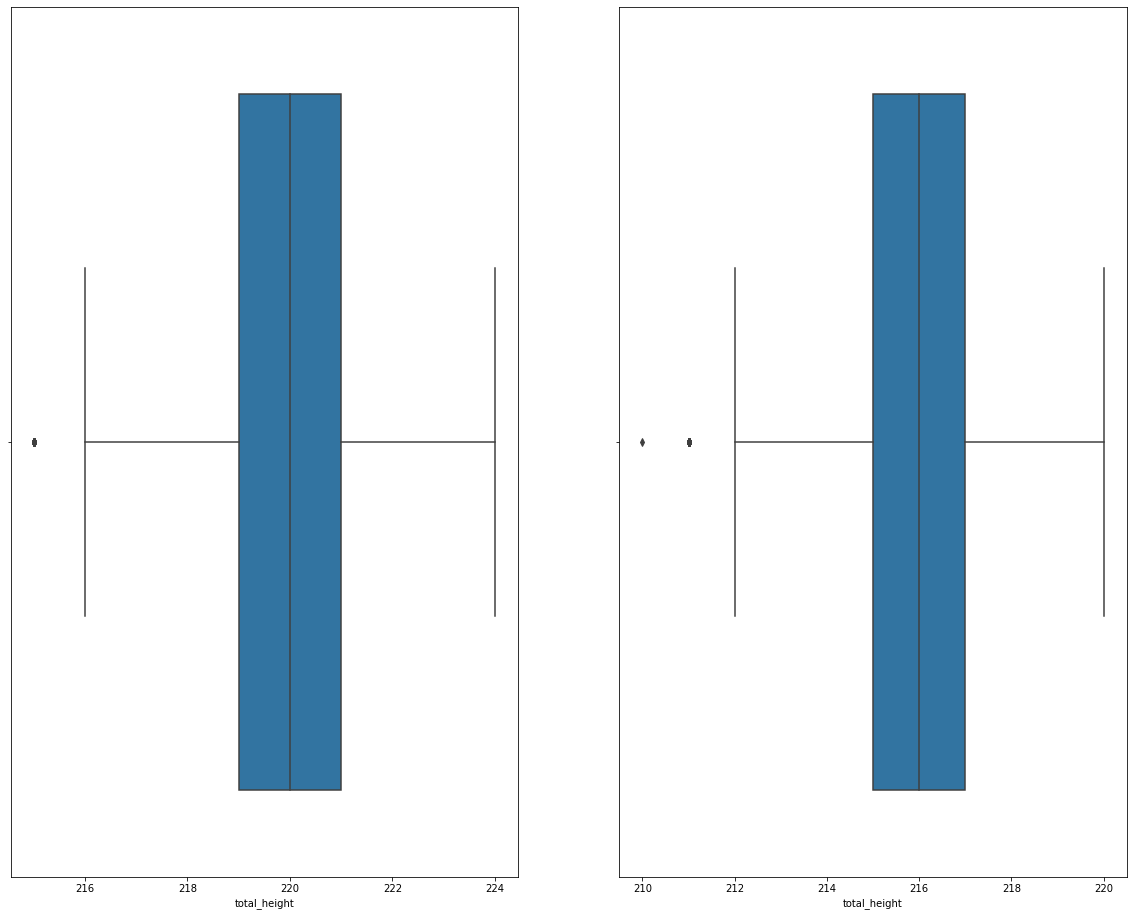

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20, 16))
sns.boxplot(df_plc26['total_height'], ax=ax[1])
sns.boxplot(df_plc25['total_height'], ax=ax[0])
plt.show()

In [18]:
# save the cleaned data as csv
df_plc25.to_csv("data/cleaned_plc25.csv", index=True, index_label='time')
df_plc26.to_csv("data/cleaned_plc26.csv", index=True, index_label='time')

## Baseline statistical detection model
The baseline model defines normal operating values of `total_height` as between 1.5 IQR above $75^{th}$ percentile and below $25^{th}$ percentile. Any points lying outside of this range for at least 5 seconds will be classified anomalous.

To achieve this, the following is to be done:
1. Join the dataframes using `pd.join`
2. Convert `time` index to `datetime` using `pd.to_datetime`
3. Calculate the $25^{th}$ and $75^{th}$ percentiles using the combined datasets.
4. Create new column `is_anomaly`
5. If `total_height` is anomalous, `1` in `is_anomaly` in corresponding row else `0`.
6. Do rolling sum of `is_anomaly` and flag any values $\geq$ 5 as anomalous.

In [19]:
df_normal = pd.concat([df_plc25, df_plc26])
df_normal.index = pd.to_datetime(df_normal.index, 
                                errors='raise', 
                                yearfirst=True,
                                format='%Y-%m-%d %H:%M:%S')

In [20]:
SEC_TO_PERSIST = 5

### Anomaly detection for data from $25^{th}$ June

In [21]:
q75_25 = df_plc25['total_height'].quantile(0.75)
q25_25 = df_plc25['total_height'].quantile(0.25)
upper_threshold_25 = q75_25 + (1.5 * plc25_iqr)     # 224
lower_threshold_25 = q25_25 - (1.5 * plc25_iqr)     # 216

In [22]:
df_plc25['anomalous_seconds'] = df_plc25['total_height']\
                                .between(lower_threshold_25, upper_threshold_25, inclusive="both")\
                                .replace({True: 0, False: 1})\
                                .rolling(SEC_TO_PERSIST)\
                                .sum()
# df_plc25['exceeds_threshold'].replace({True: 0, False: 1}, inplace=True)
# df_plc25['exceeds_threshold'].value_counts()

In [23]:
df_plc25['is_anomalous'] = 0
df_plc25.loc[df_plc25['anomalous_seconds'] >= SEC_TO_PERSIST, 'is_anomalous'] = 1
df_plc25.loc[df_plc25['is_anomalous'] == 1].index

DatetimeIndex([], dtype='datetime64[ns]', name='time', freq=None)

### Anomaly detection for $26^{th}$ data

In [24]:
# calculating the upper and lower thresholds
q25_26 = df_plc26['total_height'].quantile(0.25)
q75_26 = df_plc26['total_height'].quantile(0.75)
upper_threshold_26 = q75_26 + (1.5 * (q75_26 - q25_26))     # 220
lower_threshold_26 = q25_26 - (1.5 * (q75_26 - q25_26))     # 212

In [25]:
df_plc26['anomalous_seconds'] = df_plc26['total_height']\
                                .between(lower_threshold_26, upper_threshold_26, inclusive="both")\
                                .replace({True: 0, False: 1})\
                                .rolling(SEC_TO_PERSIST)\
                                .sum()

In [26]:
df_plc26['is_anomalous'] = 0
df_plc26.loc[df_plc26['anomalous_seconds'] >= SEC_TO_PERSIST, 'is_anomalous'] = 1
df_plc26.loc[df_plc26['is_anomalous'] == 1].index

DatetimeIndex([], dtype='datetime64[ns]', name='time', freq=None)

In [27]:
# df_plc26.to_csv("data/cleaned_plc26_anomalous.csv", index=True, index_label='time')

### Anomaly detection for combined normal data

In [28]:
IQR_SCALE = 1.5
q75 = df_normal['total_height'].quantile(0.75)      # 220
q25 = df_normal['total_height'].quantile(0.25)      # 216
upper_threshold = q75 + (IQR_SCALE * (q75 - q25))
lower_threshold = q25 - (IQR_SCALE * (q75 - q25))

In [29]:
SEC_TO_PERSIST = 5
df_normal['anomalous_seconds'] = df_normal['total_height']\
                                .between(lower_threshold, upper_threshold, inclusive="both")\
                                .replace({True: 0, False: 1})\
                                .rolling(SEC_TO_PERSIST)\
                                .sum()
df_normal['is_anomalous'] = 0
df_normal.loc[df_normal['anomalous_seconds'] >= SEC_TO_PERSIST, 'is_anomalous'] = 1
df_normal.loc[df_normal['is_anomalous'] == 1].index

DatetimeIndex([], dtype='datetime64[ns]', name='time', freq=None)

In [30]:
# df_normal.to_csv("data/cleaned_combined_anomalous.csv", index=True, index_label='time')

## Correlations between features
Correlations between features are important. They help ascertain the extent of inter-relationship between the various features. Given that there are numerous columns with only a single value, the correlations from these columns are expected to be low.

This can be understood as follows: regardless of the changes from the other variables (e.g `tank-a_height`, `valve-b_open` etc), columns with a single value remains unchanged. Based on this train of thought, the columns with a single value will be removed from the correlation calculations. The steps to be undertaken in this section are as follows:
1. Identify columns with single value using `df.nunique()`
2. Remove these columns using `df.drop(axis=1)`
3. Determine correlations using `df.corr()`
4. Plot correlations on a `sns.heatmap()`

In [31]:
df_normal.nunique()

ops_mode_scada_output             2
pump_start_output                 2
pump_start_scada_input            1
valve-a_start_scada_input         1
valve-b_start_scada_input         1
tank-a_upper_sensor               2
tank-a_height                    81
tank-a_lower_sensor               1
tank-b_upper_sensor               2
tank-b_height                    81
tank-b_lower_sensor               1
valve-a_hmi_input                 1
valve-a_open                      2
valve-b_hmi_input                 1
valve-b_open                      2
writable_ops_mode_scada_input     2
total_height                     15
anomalous_seconds                 1
is_anomalous                      1
dtype: int64

In [32]:
df_normal.nunique()
col_to_drop = []
for col in df_normal.columns:
    # print(df_normal[col].nunique())
    if df_normal[col].nunique() == 1:
        col_to_drop.append(col)
df_normal.drop(col_to_drop, axis=1, inplace=True)
df_normal.columns

Index(['ops_mode_scada_output', 'pump_start_output', 'tank-a_upper_sensor',
       'tank-a_height', 'tank-b_upper_sensor', 'tank-b_height', 'valve-a_open',
       'valve-b_open', 'writable_ops_mode_scada_input', 'total_height'],
      dtype='object')

<AxesSubplot:>

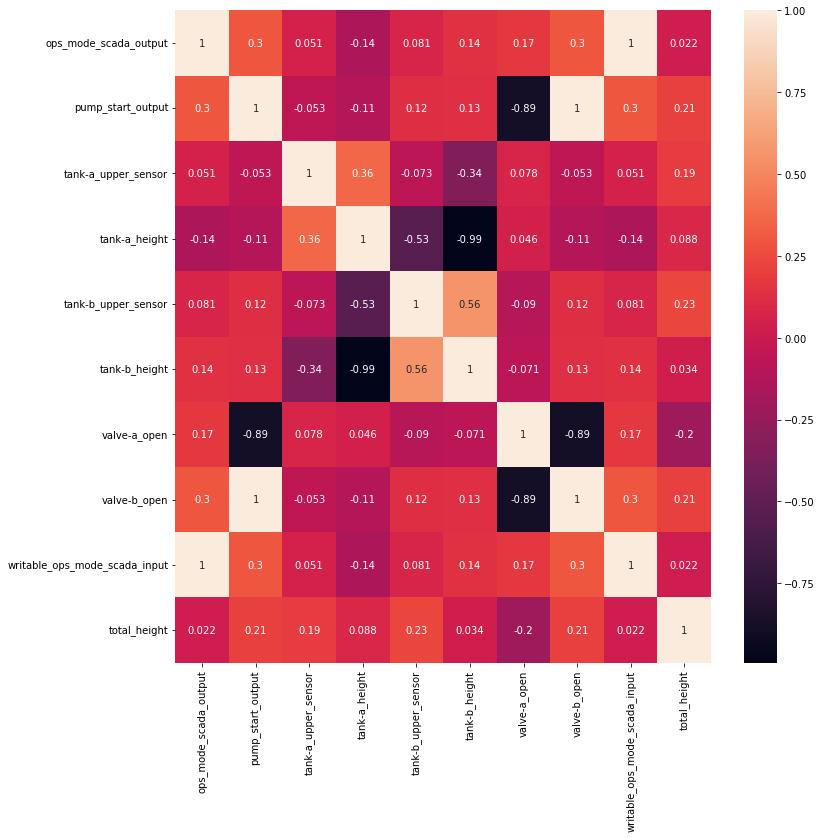

In [33]:
import seaborn as sns
%matplotlib inline
corr = df_normal.corr()
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, xticklabels=df_normal.columns, yticklabels=df_normal.columns, ax=ax, annot=True)

Based on the heatmap above, the following pair of features have significant correlations $\ge |0.3|$

* `pump_start_output` to `valve-a_open` at -0.89, `valve-b_open` at 1.0 and `total_height` at 0.21
* `tank-a_upper_sensor` to `tank-a_height` at 0.36, `tank-b_height` at -0.34
* `tank-a_height` to `tank-b_upper_sensor` at -0.53, `tank-b_height` at -0.99
* `tank-b_upper_sensor` to `tank-b_height` at 0.56
* `valve-a_open` to `valve-b_open` at -0.89

<AxesSubplot:>

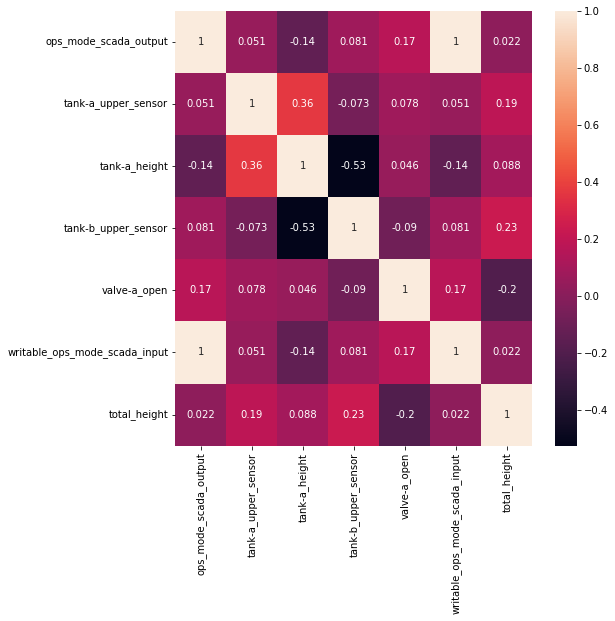

In [46]:
df_normal_pop = df_normal.drop(['pump_start_output', 'tank-b_height', 'valve-b_open'], axis=1)
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df_normal_pop.corr(), xticklabels=df_normal_pop.columns, yticklabels=df_normal_pop.columns, ax=ax, annot=True)

Given the extremely high correlation values seen above, the following columns will be dropped without excessive loss of information:
* `pump_start_output`
* `tank-b_height`
* `valve-b_open`

Let's run a Variance Inflation Factor (VIF) test on the remaining features from `statsmodels` to see the amount of multilinearlity among them. We are trying to have a value less than 5.

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame(columns=["features", "vif"])
vif_df["features"] = df_normal_pop.columns
vif_df["vif"] = [vif(df_normal_pop.values, i) for i in range(len(df_normal_pop.columns))]
vif_df

/home/ahwz84/miniconda3/envs/water/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,vif
0,ops_mode_scada_output,inf
1,tank-a_upper_sensor,1.240196
2,tank-a_height,43.914190
3,tank-b_upper_sensor,1.633933
4,valve-a_open,1.567834
5,writable_ops_mode_scada_input,inf
6,total_height,72.281859


## Decompose features with `PCA`
It is not straightforward to drop features with just the values of their (linear) correlations as there are some other features that have minimal correlation values with the feature in question. To better ascertain the features to drop, `PCA` can first be applied to **scaled** features in `df_normal`. The top features accounting for the maximum variance will be selected while the rest will be dropped. 

Dropping of unnecessary features with `PCA` has the following benefits:
1. Reduction in complexity of dataset
2. Faster training time for model
3. Reduce risk of overfitting without sacrificing model generalizability.

In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [37]:
# ascertain that the columns with 2 unique values indeed contain only 0's and 1's
df_normal[['pump_start_output', 'tank-a_upper_sensor', 'tank-b_upper_sensor', 'valve-a_open', 'valve-b_open']].value_counts()

pump_start_output  tank-a_upper_sensor  tank-b_upper_sensor  valve-a_open  valve-b_open
1.0                0.0                  0.0                  0.0           1.0             29176
0.0                0.0                  0.0                  1.0           0.0             16589
1.0                0.0                  1.0                  0.0           1.0              4725
0.0                0.0                  0.0                  0.0           0.0              3031
                   1.0                  0.0                  1.0           0.0              1271
                   0.0                  1.0                  1.0           0.0              1250
1.0                1.0                  0.0                  0.0           1.0              1239
dtype: int64

In [38]:
# df_normal.nunique()
min_max_scalar = MinMaxScaler()
df_normal_scale = min_max_scalar.fit_transform(df_normal)
df_normal_scale = pd.DataFrame(df_normal_scale, columns=df_normal.columns, index=df_normal.index)

In [39]:
pca = PCA(n_components=3)
pca_normal_scale = pca.fit_transform(df_normal_scale)
# type(pca_normal_scale)
pca_normal_scale.shape

(57281, 3)

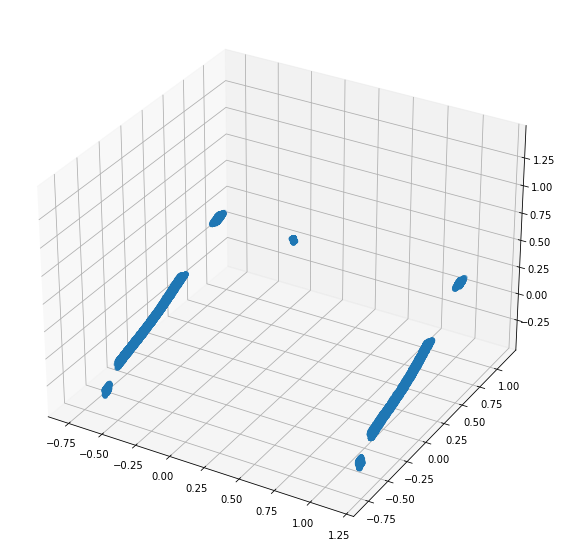

In [40]:
# for comp, marker, color in zip(range(pca_normal_scale.shape[1]), ['^', 's', 'o'], ['blue', 'green', 'grey']):
#     sns.scatterplot(pca_normal_scale[:,comp], 
#                     markers=marker,
#                     color=color)
from mpl_toolkits.mplot3d import Axes3D
import ipympl
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter3D(pca_normal_scale[:,0], pca_normal_scale[:,1], pca_normal_scale[:,2])

In [41]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

## Attack dataframe
Read in the attack data as `pd.df` and remove the redundant columns such as `raw-lvl` and `vol` as these do not confer additional information. Create the `total_height`, `anomalous_seconds` and `is_anomalous` columns to start detecting anomalies. 

Unfortunately in this instance, water has been added to the tank prior to the launching of the attacks. This invalidates the normal behaviour and changes the distribution of `total_height` that the model learns in the normal operations dataset.

The solution implemented here is for the model to learn the *normal* behaviour from the period prior to the first attack. Take note that the rule-based model is susceptible to changes in conditions such as addition/removal of water.

In [42]:
def clean_df(df):
    """Takes in a time-indexed dataframe and renames the 
        header to be consistent with earlier columns.
    Args:
        df (pd.df): A pandas dataframe to be processed
    """
    df.columns = ['ops_mode_scada_output',
                    'pump_start_output', 
                    'quality',
                    'pump_start_scada_input',
                    'valve-a_start_scada_input',
                    'valve-b_start_scada_input',
                    'tank-a_upper_sensor',
                    'tank-a_height',
                    'tank-a_lower_sensor',
                    'tank-a_raw_lvl',
                    'tank-a_vol',
                    'tank-b_upper_sensor',
                    'tank-b_height',
                    'tank-b_lower_sensor',
                    'tank-b_raw_lvl',
                    'tank-b_vol',
                    'valve-a_hmi_input',
                    'valve-a_open',
                    'valve-b_hmi_input',
                    'valve-b_open',
                    'writable_ops_mode_scada_input']
    df.replace([True, False], value=[1, 0], inplace=True)
    df.index.rename('time', inplace=True)
    df.index = pd.to_datetime(df.index, 
                                errors='raise', 
                                yearfirst=True,
                                format='%Y-%m-%d %H:%M:%S')
    df.drop(labels=['quality', 'tank-a_raw_lvl', 'tank-b_raw_lvl', 'tank-a_vol', 'tank-b_vol'], axis=1, inplace=True)
    return df

In [43]:
df_atk = pd.read_csv("data/logs_attack_20220606_1450-1531_plc.csv", index_col=0, header=0, parse_dates=True)

FileNotFoundError: [Errno 2] No such file or directory: 'data/logs_attack_20220606_1450-1531_plc.csv'

In [ ]:
df_atk = clean_df(df_atk)
df_atk.info()

In [ ]:
df_atk['total_height'] = df_atk['tank-a_height'] + df_atk['tank-b_height']
print(max(df_atk['total_height']), min(df_atk['total_height']))

In [ ]:
SEC_TO_PERSIST = 60
df_atk['anomalous_seconds'] = df_atk['total_height']\
                                .between(lower_threshold, upper_threshold, inclusive="both")\
                                .replace({True: 0, False: 1})\
                                .rolling(SEC_TO_PERSIST)\
                                .sum()
df_atk['is_anomalous'] = 0
df_atk.loc[df_atk['anomalous_seconds'] >= SEC_TO_PERSIST, 'is_anomalous'] = 1
df_atk.loc[df_atk['is_anomalous'] == 1].index.time

In [ ]:
sns.distplot(df_atk['total_height'])
# plt.show()

In [ ]:
plt.subplots(figsize=(15, 10))
plt.plot(df_atk.index, df_atk['total_height'])

Note that the normal `total_height` changed after the first attack. Additional water has been added which changes the *normal operating conditions* of the tank. The part **BEFORE** the addition of water will be removed from the attack dataset.

In [ ]:
# df_atk_cut = df_atk.loc[df_atk.index.time >= pd.Timestamp(14:57:00)]
mask = (df_atk.index >= pd.to_datetime('2022-06-06 14:58:00'))
df_atk_cut = df_atk.loc[mask]

In [ ]:
IQR_SCALE = 1.5
atk_iqr = df_atk_cut['total_height'].quantile(0.75) - df_atk_cut['total_height'].quantile(0.25)
df_atk_upper = df_atk_cut['total_height'].quantile(0.75) + (IQR_SCALE * atk_iqr)
df_atk_lower = df_atk_cut['total_height'].quantile(0.25) - (IQR_SCALE * atk_iqr)

In [ ]:
SEC_TO_PERSIST = 5
df_atk_cut['anomalous_seconds'] = df_atk_cut['total_height']\
                                .between(df_atk_lower, df_atk_upper, inclusive="both")\
                                .replace({True: 0, False: 1})\
                                .rolling(SEC_TO_PERSIST)\
                                .sum()
df_atk_cut['anomalous_seconds'].fillna(0, inplace=True)

In [ ]:
df_atk_cut['anomalous_seconds'].unique()

In [ ]:
df_atk_cut['is_anomalous'] = 0
df_atk_cut.loc[df_atk_cut['anomalous_seconds'] >= SEC_TO_PERSIST, 'is_anomalous'] = 1
anomalous_index = df_atk_cut.loc[df_atk_cut['is_anomalous'] == 1].index

In [ ]:
# df_atk_cut.to_csv("data/detected_atk.csv", header=0, index=True, index_label='time')
df_atk_cut.to_csv("data/detected_atk.csv")

In [ ]:
atk_time = pd.DataFrame({'from': ['2022-06-06 15:06:47',
                        '2022-06-06 15:11:48',
                        '2022-06-06 15:19:33',
                        '2022-06-06 15:30:40'],
                'to': ['2022-06-06 15:10:23',
                        '2022-06-06 15:13:15',
                        '2022-06-06 15:21:32',
                        '2022-06-06 15:30:59']})

In [ ]:
plt.subplots(figsize=(15,10))
plt.plot(df_atk_cut.index, df_atk_cut['total_height'])
for _, row in atk_time.iterrows():
    plt.fill_between(row, 255, color='red')
plt.ylim(210, 255)

## Implementation of ML models for AD
Now that we have a baseline model, try 2 unsupervised ML models for AD - `IsolationForest` and `OCSVM`, both implemented in the `pyod` package.

In [ ]:
from pyod.models.iforest import IForest
from pyod.models.ocsvm import OCSVM
from pyod.models.lof import LOF
from pyod.models.hbos import HBOS   # assumes feature-independence
from pyod.models.ecod import ECOD   # based on empirical CDF distributions

In [ ]:
# df_atk_cut_unsupv = df_atk_cut.pop('is_anomalous')
df_atk_cut.columns

In [ ]:
ifor = IForest(contamination=0.2, n_jobs=-1, random_state=42, verbose=1)
ifor.fit(df_atk_cut)

In [ ]:
ifor.fit_predict_score

In [ ]:
predictions = ifor.predict(df_atk_cut)

In [ ]:
anomaly_index_pred = np.where(predictions == 1) # tuple
# anomaly_index_pred.